In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Tri1 Kaggle Challenge/sales_train.csv', parse_dates=['date'], dayfirst=True)

In [3]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [5]:
data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [6]:
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [7]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013
...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,10,10,2015
2935845,2015-10-09,33,25,7460,299.00,1.0,9,10,2015
2935846,2015-10-14,33,25,7459,349.00,1.0,14,10,2015
2935847,2015-10-22,33,25,7440,299.00,1.0,22,10,2015


In [8]:
month_wise_data = data.groupby(['month','year'])['item_cnt_day'].agg(['sum','count'])

In [9]:
month_wise_data.reset_index(inplace=True)

In [10]:
data_2013 = month_wise_data[month_wise_data['year'] == 2013]
data_2014 = month_wise_data[month_wise_data['year'] == 2014]
data_2015 = month_wise_data[month_wise_data['year'] == 2015]

In [11]:
data_2013

,month,year,sum,count
0,1,2013,131479.0,115690
3,2,2013,128090.0,108613
6,3,2013,147142.0,121347
9,4,2013,107190.0,94109
12,5,2013,106970.0,91759
15,6,2013,125381.0,100403
18,7,2013,116966.0,100548
21,8,2013,125291.0,104772
24,9,2013,133332.0,96137
27,10,2013,127541.0,94202


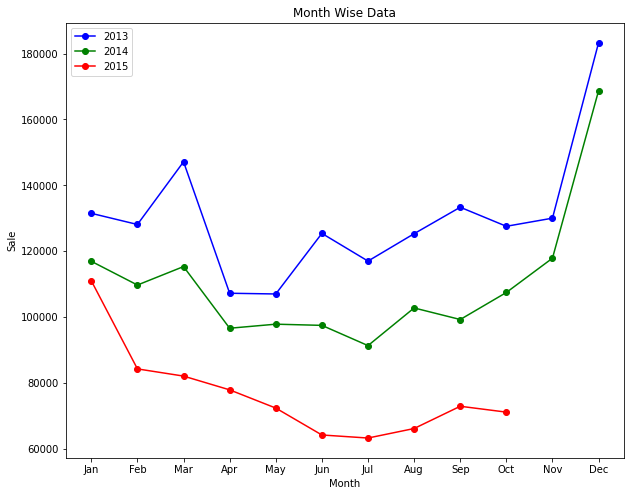

In [12]:
months_indicator = ['Jan', 'Feb','Mar','Apr','May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10,8))

plt.title('Month Wise Data')
plt.xlabel('Month')
plt.ylabel('Sale')

plt.plot(months_indicator, data_2013['sum'],'b-o', label='2013')
plt.plot(months_indicator, data_2014['sum'],'g-o', label='2014')
plt.plot(months_indicator[:10], data_2015['sum'],'r-o', label='2015')

plt.legend()
plt.show();

In [13]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013
...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,10,10,2015
2935845,2015-10-09,33,25,7460,299.00,1.0,9,10,2015
2935846,2015-10-14,33,25,7459,349.00,1.0,14,10,2015
2935847,2015-10-22,33,25,7440,299.00,1.0,22,10,2015


In [14]:
items = pd.read_csv('/content/drive/MyDrive/Tri1 Kaggle Challenge/items.csv')

In [15]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [16]:
shops = pd.read_csv('/content/drive/MyDrive/Tri1 Kaggle Challenge/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [17]:
item_category = pd.read_csv('/content/drive/MyDrive/Tri1 Kaggle Challenge/item_categories.csv')
item_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [18]:
new_data = items.join(item_category.set_index('item_category_id'), on='item_category_id')

In [19]:
new_data.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD


In [20]:
full_data = data.join(new_data.set_index('item_id'), on='shop_id')

In [21]:
full_data.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,100 шедевров классики (mp3-CD) (Digipack),57,Музыка - MP3
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013,/ТЫ - ТРУП,40,Кино - DVD
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013,/ТЫ - ТРУП,40,Кино - DVD
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013,/ТЫ - ТРУП,40,Кино - DVD
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,/ТЫ - ТРУП,40,Кино - DVD


In [26]:
test_data = pd.read_csv('/content/drive/MyDrive/Tri1 Kaggle Challenge/test.csv')
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [27]:
X = full_data[['shop_id','item_id']]
y = full_data['item_cnt_day']

In [28]:
X

,shop_id,item_id
0,59,22154
1,25,2552
2,25,2552
3,25,2554
4,25,2555
...,...,...
2935844,25,7409
2935845,25,7460
2935846,25,7459
2935847,25,7440


In [29]:
y

0          1.0
1          1.0
2         -1.0
3          1.0
4          1.0
          ... 
2935844    1.0
2935845    1.0
2935846    1.0
2935847    1.0
2935848    1.0
Name: item_cnt_day, Length: 2935849, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
LR_Model = LinearRegression()

In [34]:
LR_Model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred = LR_Model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, 

In [41]:
import math
mse = mean_squared_error(y_test, y_pred)
math.sqrt(mse)


2.0652849356639744